# Generate test stimuli for rhythmMF psychometrics

### Objective:
Bird 1 and 6 can learn reliably up to 2 pairs of shuffle wavs.  
Let's take the shuffle wavs, linearly interpolate them along some axes (rhythm or multifractality), and give to the birds. Hopefully we can calculate psychometric functions of how the birds are listening to the rhythms. 

In [1]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir
import pandas as pd
import numpy as np
from scipy.io.wavfile import read, write
from starling_rhythm.utils.audio import extract_amp_env
import matplotlib.pyplot as plt

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
bID = 's_b1555_22'

In [3]:
SAVE_PATH = PROCESSED_DIR / bID / 'stimuli_candidates.pickle'

In [4]:
stims = pd.read_pickle(SAVE_PATH)
trained_stims = stims[:4]
trained_stims

index                                       shuffle_wavs  \
13   9837  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
5    9829  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
30  13886  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
6   13862  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                       shuffle_og_seg  shuffle_ts  seg_nb  \
13  s_b1555_22_2022-09-26_14-00-01-02_173815_20667...  122.782469     307   
5   s_b1555_22_2022-09-26_14-00-01-02_173815_20667...   40.927312     307   
30  s_b1555_22_2022-09-29_10-00-01-02_565720_60383...    6.009748     433   
6   s_b1555_22_2022-09-29_10-00-01-02_565720_60383...   83.369838     433   

   type  sanity_tmf                                             SDoTMF  \
13  max  107.209512  [93.79242161741706, 119.99782292320799, 79.983...   
5   min   36.529163  [40.95997244895142, 35.37399286030329, 41.6224...   
30  min    7.614779  [8.361501524561248, 10.62422564016631, 10.2048...   
6   max   69.515347  [51.6913887379686, 79.66841249919511, 56.81157...   

    mean_SDoTMF  se_SDoTMF    tmf_dif  tmf_dif_rank  pair_index  
13    92.718680  13.628472  54.869781           1.0           0  
5     37.848900   5.312385  54.869781           1.0           0  
30     8.363697   1.246702  52.025441           3.0           1  
6     60.389137   6.602729  52.025441           3.0           1

In [5]:
trained_stims

index                                       shuffle_wavs  \
13   9837  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
5    9829  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
30  13886  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
6   13862  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                       shuffle_og_seg  shuffle_ts  seg_nb  \
13  s_b1555_22_2022-09-26_14-00-01-02_173815_20667...  122.782469     307   
5   s_b1555_22_2022-09-26_14-00-01-02_173815_20667...   40.927312     307   
30  s_b1555_22_2022-09-29_10-00-01-02_565720_60383...    6.009748     433   
6   s_b1555_22_2022-09-29_10-00-01-02_565720_60383...   83.369838     433   

   type  sanity_tmf                                             SDoTMF  \
13  max  107.209512  [93.79242161741706, 119.99782292320799, 79.983...   
5   min   36.529163  [40.95997244895142, 35.37399286030329, 41.6224...   
30  min    7.614779  [8.361501524561248, 10.62422564016631, 10.2048...   
6   max   69.515347  [51.6913887379686, 79.66841249919511, 56.81157...   

    mean_SDoTMF  se_SDoTMF    tmf_dif  tmf_dif_rank  pair_index  
13    92.718680  13.628472  54.869781           1.0           0  
5     37.848900   5.312385  54.869781           1.0           0  
30     8.363697   1.246702  52.025441           3.0           1  
6     60.389137   6.602729  52.025441           3.0           1

In [6]:
pair_indices = [0, 1]

/mnt/cube/j8xing/conda_envs/txori/starling_rhythm/lib/python3.10/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


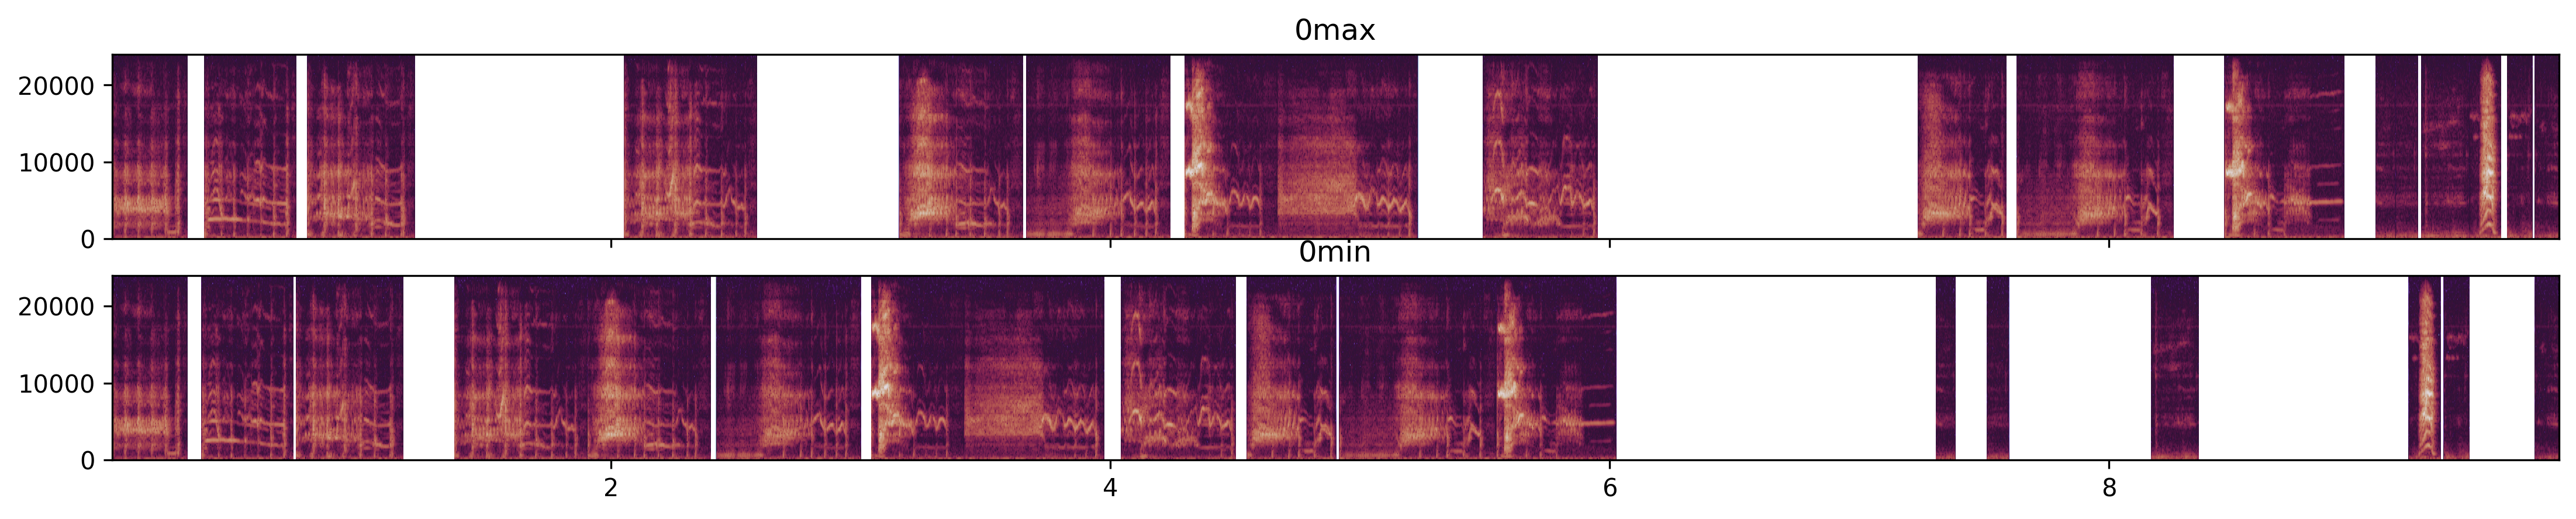

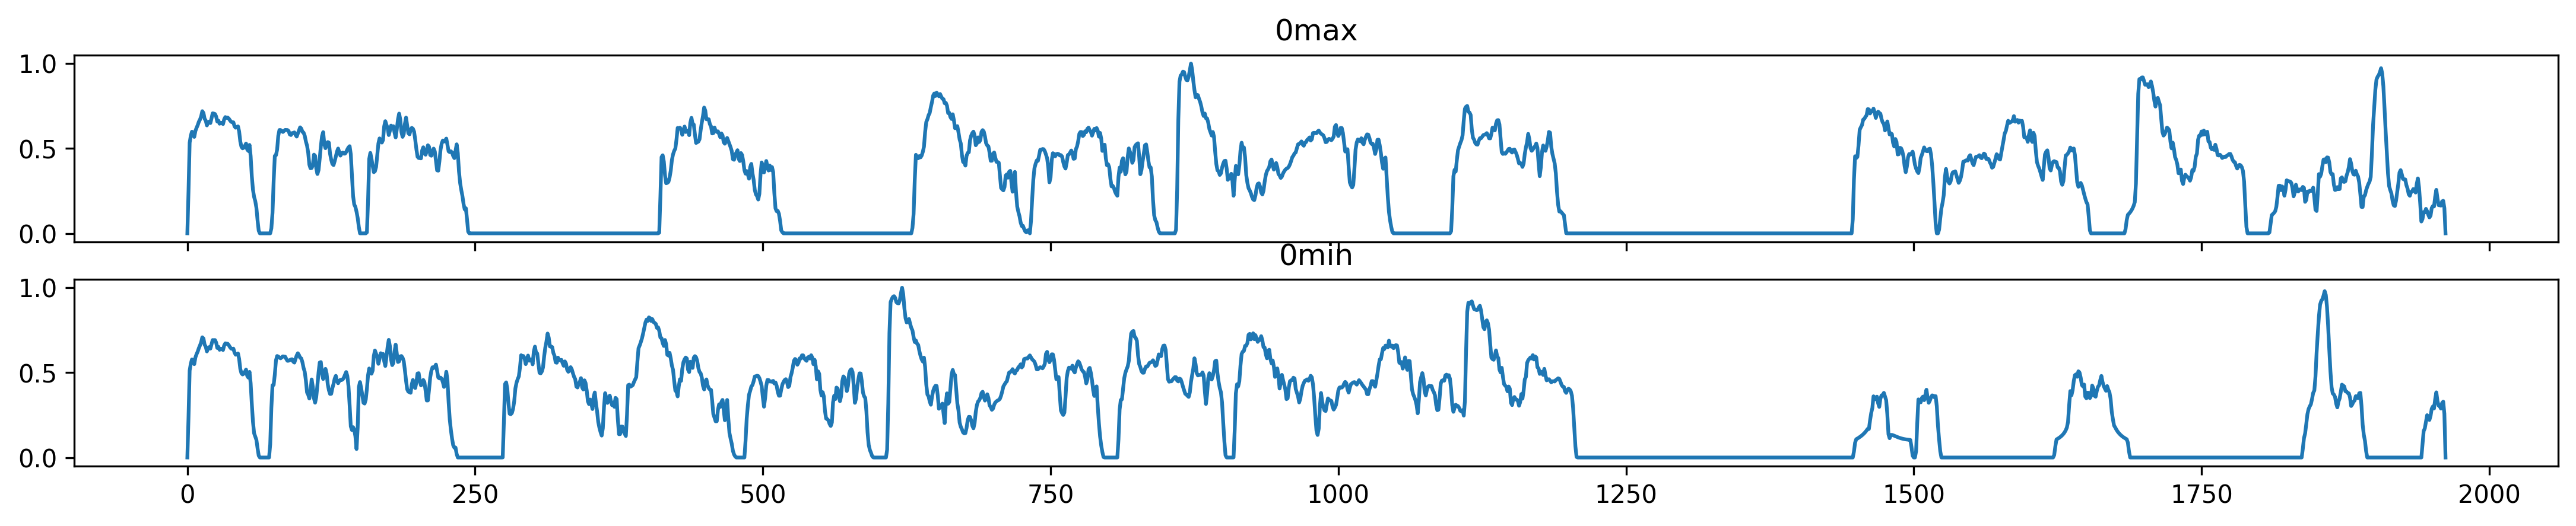

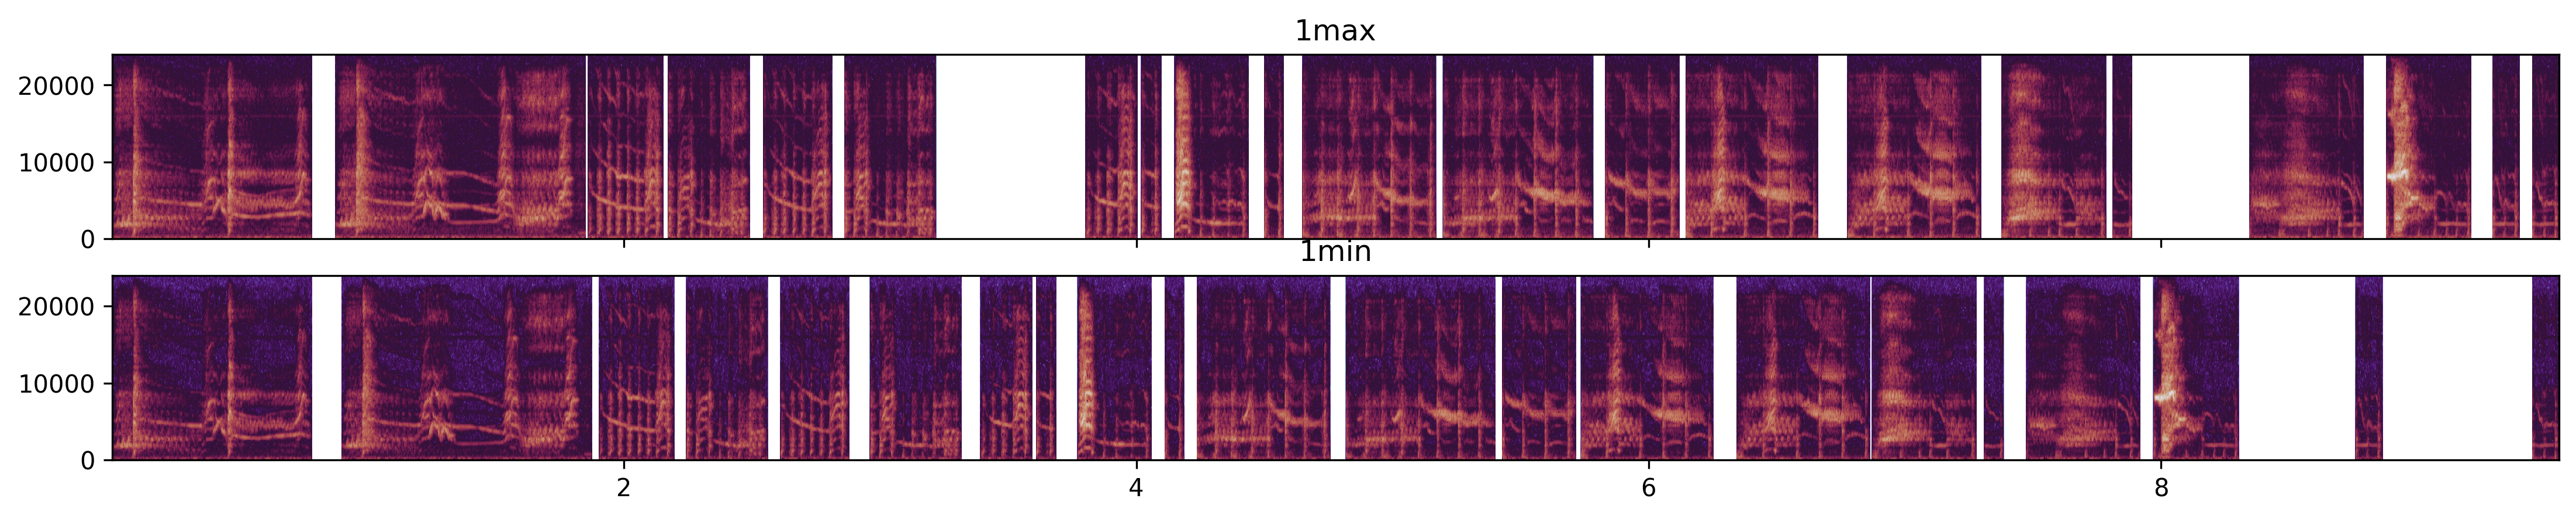

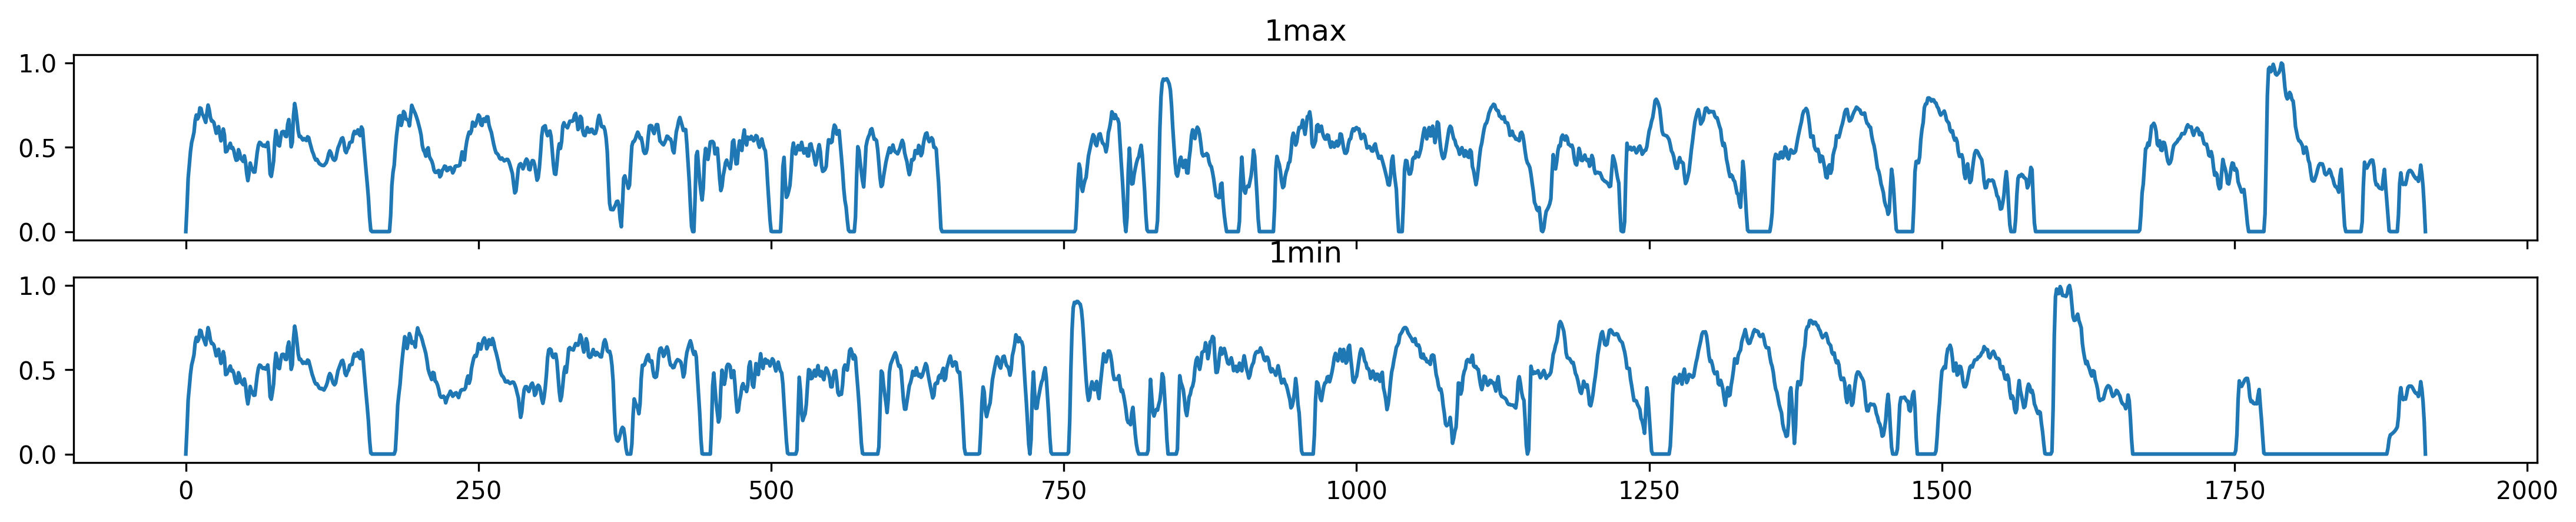

In [7]:
for pair_index in pair_indices:
    selected_seg = trained_stims[trained_stims['pair_index'] == pair_index]
    max_address = selected_seg[selected_seg['type'] == 'max'].shuffle_wavs.values[0]
    min_address = selected_seg[selected_seg['type'] == 'min'].shuffle_wavs.values[0]
    max_wf = read(max_address)[1]
    min_wf = read(min_address)[1]
    max_ae = extract_amp_env(max_wf, target_sr = 200, spl = True, hilbert_artifacts = True)
    min_ae = extract_amp_env(min_wf, target_sr = 200, spl = True, hilbert_artifacts = True)
    fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
    axs[0].title.set_text(str(pair_index) + 'max')
    x = axs[0].specgram(max_wf, Fs = 48000, cmap = 'twilight')
    axs[1].title.set_text(str(pair_index) + 'min')
    y = axs[1].specgram(min_wf, Fs = 48000, cmap = 'twilight')
    fig, axs = plt.subplots(2, sharex = True, figsize=(18, 3), dpi=300)
    axs[0].title.set_text(str(pair_index) + 'max')
    x = axs[0].plot(max_ae)
    axs[1].title.set_text(str(pair_index) + 'min')
    y = axs[1].plot(min_ae)

## Task 1: Calculate linear interpolation in the rhythm space. 
### Specs:
- Take current wavs, calculate indices of 0s, triangulate where all the syllable stop and starts are. 
- Have a list of syllable waveforms, and two lists of gaps. 
- Linearly interpolate the gaps. 

In [8]:
## locate the progenitor segments
bID_DIR = PROCESSED_DIR / bID
syllable_df = list(bID_DIR.glob('syllable_df_labels.pickle'))[0]
syllable_df = pd.read_pickle(syllable_df)

In [9]:
syllable_df

file  onsets_ms  \
0      /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...      0.754   
1      /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...      1.828   
2      /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...      3.680   
3      /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...      5.632   
4      /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...      6.162   
...                                                  ...        ...   
60376  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...     30.155   
60377  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...     30.905   
60378  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...     31.678   
60379  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...     32.429   
60380  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...     32.569   

       offsets_ms                     umap  hdbscan_labels  
0           1.826    [-8.604912, 7.309538]             137  
1           2.338   [-10.148851, 5.063254]             112  
2           4.537  [-5.2042804, 12.267234]             189  
3           6.140  [-3.7597797, 11.497626]              -1  
4           6.284  [2.050827, 0.011981498]             193  
...           ...                      ...             ...  
60376      30.803  [-11.164899, 2.6515484]             121  
60377      31.609  [3.2972312, -3.1319356]             146  
60378      32.390  [3.3780773, -3.0171862]             146  
60379      32.542   [-6.3328857, 2.910542]             202  
60380      33.474    [2.0359507, 4.680669]             207  

[60381 rows x 5 columns]

In [10]:
syllable_df.file[0]

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/s_b1555_22_2022-09-21_19-00-01-02_1204225_1234665.wav')

In [11]:
bID_DIR 

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22')

### For each pair index, retrieve a syllable wav list, and a silence list

In [12]:
from starling_rhythm.synth import taper_audio, float32_to_int16

In [13]:
def query_source_lists(pair_index):
    
    ## find the og name, strt, and end markers
    df_pair = trained_stims[trained_stims.pair_index == pair_index]
    shuffle_name = df_pair.shuffle_og_seg.values[0]
    shuffle_query = shuffle_name.split('_')
    og_name = "_".join(shuffle_query[0:7]) + ".wav"
    og_address = seg_address = bID_DIR / og_name 
    seg_name = "_".join(shuffle_query[0:10]) + ".wav"
    seg_address = bID_DIR / 'segments' / seg_name 
    
    strt = int(shuffle_query[8][:-2])
    end = int(shuffle_query[9][:-2])
    
    ## find corresponding syllable information
    file_df = syllable_df[syllable_df['file'] == og_address]
    stimuli_syllable = file_df[(file_df['onsets_ms'] > strt) & (file_df['offsets_ms'] < end)]
    
    ## retrieve the audio
    rate, audio = read(seg_address)
    taper = int(2*(rate/1000))
    min_onset = int(min(stimuli_syllable.onsets_ms) * rate)
    max_offset = int(max(stimuli_syllable.offsets_ms) * rate)
    onsets_ms = stimuli_syllable.onsets_ms.values
    offsets_ms = stimuli_syllable.offsets_ms.values
    
    syllable_list = []
    
    ## construct syllable_list
    for onset, offset in zip(onsets_ms, offsets_ms):
        onset = int((onset-strt) * rate)
        offset = int((offset-strt) * rate)
        syllable_list.append(audio[onset:offset])
        
    syllable_list = [taper_audio(syllable, taper = taper) for syllable in syllable_list]
        
    ## construct gap_list
    gap_list = list((onsets_ms[1:] - offsets_ms[:-1]) * rate)
    gap_list = [int(i) for i in gap_list]
    
    return syllable_list, gap_list

In [14]:
pair0_syllables, pair0_gaps = query_source_lists(0)
pair1_syllables, pair1_gaps = query_source_lists(1)

In [15]:
max0_address = trained_stims[(trained_stims.pair_index == 0) & (trained_stims.type == 'max')].shuffle_wavs.values[0]
min0_address = trained_stims[(trained_stims.pair_index == 0) & (trained_stims.type == 'min')].shuffle_wavs.values[0]
max1_address = trained_stims[(trained_stims.pair_index == 1) & (trained_stims.type == 'max')].shuffle_wavs.values[0]
min1_address = trained_stims[(trained_stims.pair_index == 1) & (trained_stims.type == 'min')].shuffle_wavs.values[0]

In [16]:
def gap_estimation(data):
    
    # Get indices of all 0s
    indices_0 = np.where(data == 0)[0]
    
    # find the difference between adjacent elements
    diff = np.diff(indices_0)

    # find the indices where the difference is not 1
    idx = np.where(diff != 1)[0]

    # count the length of consecutive sequences
    count = np.concatenate(([idx[0] + 1], np.diff(idx), [len(indices_0) - idx[-1] - 1]))
    
    return count

In [17]:
pair0max_gap_ref = gap_estimation(read(max0_address)[1])
pair0max_gap_ref = pair0max_gap_ref[pair0max_gap_ref > min(pair0_gaps)]

pair0min_gap_ref = gap_estimation(read(min0_address)[1])
pair0min_gap_ref = pair0min_gap_ref[pair0min_gap_ref > min(pair0_gaps)]

pair1max_gap_ref = gap_estimation(read(max1_address)[1])
pair1max_gap_ref = pair1max_gap_ref[pair1max_gap_ref > min(pair1_gaps)]

pair1min_gap_ref = gap_estimation(read(min1_address)[1])
pair1min_gap_ref = pair1min_gap_ref[pair1min_gap_ref > min(pair1_gaps)]

In [18]:
pair0max_gap_ref

array([ 3230,  2136, 40284, 27406,   650,  2712,    99, 12582, 61488,
        1994,  9809,  6072,   128,   654,   116,  1046,   510])

In [19]:
pair0min_gap_ref

array([ 2703,   505,  9803,    93,  1034,  1992,   147,  3222,  2111,
         698,   113, 61464,  6081, 27390, 40293,   662, 12605])

In [20]:
pair1max_gap_ref

array([ 4377,   396,   904,  2503,  2268, 28038,   685,  2485,  3001,
        3537,  1380,  2350,  1200,  5496,  3823,  1291, 21935,  4259,
        4042,  2344])

In [21]:
# manual assertion correction
pair1max_gap_ref = np.array([ 4377,   396,   904,  2503,  2268, 28038,   685,  2485,  3001,
        3537,  1380,  2344,  1200,  5496,  3823,  1291, 21935,  4259,
        4042,  2350])

In [22]:
pair1min_gap_ref

array([ 5529,  1307,  2247,  2358,  3853,  3511,   685,  4021,  2474,
        2385,  3012,  1199,   912,  4344,   367,  1387,  4272,  2483,
       21945, 28023])

## Using the original source gap lists, reconstruct the trained shuffles

In [23]:
def retrieve_gap(empirical_gap_list, reference_gap_list):
    
    ## make sure two gap lists are the same length
    assert len(empirical_gap_list) == len(reference_gap_list)
    
    ## sort the gap list to make a dictionary of gaps
    sorted_emp_gaps = empirical_gap_list
    sorted_emp_gaps.sort()
    
    ## convert reference into ranked indices
    ranked_indices = np.argsort(np.argsort(reference_gap_list))
    
    ## rank replace empirical values into list
    approximate_gap_list = [sorted_emp_gaps[i] for i in ranked_indices]
    
    return approximate_gap_list

In [24]:
pair0max_gap_corrected = retrieve_gap(pair0_gaps, pair0max_gap_ref)

In [25]:
pair0min_gap_corrected = retrieve_gap(pair0_gaps, pair0min_gap_ref)

In [26]:
pair1max_gap_corrected = retrieve_gap(pair1_gaps, pair1max_gap_ref)

In [27]:
pair1min_gap_corrected = retrieve_gap(pair1_gaps, pair1min_gap_ref)

In [28]:
import librosa

def concat_synth(syllable_list, gap):
    
    ## make a deepcopy
    gap_list = gap
    
    try:
        assert(len(syllable_list) == len(gap_list))
    except:
        ## make both list equal length
        gap_list.append(0)
    
    syn_song = []
    
    for syllable, gap in zip(syllable_list, gap_list):
        syn_song.append(syllable)
        try:
            syn_song.append(np.zeros(gap))
        except:
            pass
        
    syn_song = np.concatenate(syn_song)
    
    ## normalize
    syn_song = librosa.util.normalize(syn_song)
    
    ## use int16 to save space
    syn_song = float32_to_int16(syn_song)
    
    return syn_song

In [29]:
resynth_pair0max = concat_synth(pair0_syllables, pair0max_gap_corrected)
resynth_pair0min = concat_synth(pair0_syllables, pair0min_gap_corrected)
resynth_pair1max = concat_synth(pair1_syllables, pair1max_gap_corrected)
resynth_pair1min = concat_synth(pair1_syllables, pair1min_gap_corrected)

## make sure estimated gap lists accurately reconstruct the training stimuli

In [30]:
assert np.allclose(resynth_pair0min, read(min0_address)[1])
assert np.allclose(resynth_pair0max, read(max0_address)[1])
assert np.allclose(resynth_pair1min, read(min1_address)[1])
assert np.allclose(resynth_pair1max, read(max1_address)[1])

#### Confirmed that we can accurate reconstruct training stimuli with gap lists

## Interpolate gap lists
For index, there exists two gap lists. Write a function that linearly interpolates individual values of the gap_list

In [31]:
import numpy as np

In [32]:
n = 128 ## TS used 128

In [33]:
def interpolater(x_list, y_list, n = 0):
    
    stack = []
    
    ### linearly interpolate the values of two lists
    for x, y in zip(x_list, y_list):
        stack.append(
            np.linspace(x, y, num = n)
        )
        
    stack = np.swapaxes(stack, 0, 1) ## re-cast into gap list format
    stack = stack.astype(int) ## make every number int
    
    return stack

In [34]:
pair_0_interpolated_gaps = interpolater(pair0max_gap_corrected, pair0min_gap_corrected, n = 128)
pair_1_interpolated_gaps = interpolater(pair1max_gap_corrected, pair1min_gap_corrected, n = 128)

## Write new stimuli with interpolated gaps

In [35]:
def save_interpolated(pair_index, empirical_syllables, interpolater_gaps):
    for n, gap_list in zip(np.arange(0, len(interpolater_gaps)), interpolater_gaps):
        data = concat_synth(empirical_syllables, gap_list)
        name = 'shuffleGap_INTER_' + str(pair_index) + '_' + str(n) + '.wav'
        address = PROCESSED_DIR / bID / "salv_interpolate" / name
        ensure_dir(address)
        write(address, 48000, data)

In [36]:
save_interpolated(0, pair0_syllables, pair_0_interpolated_gaps)

In [37]:
save_interpolated(1, pair1_syllables, pair_1_interpolated_gaps)

## Task 2: Calculate linear interpolation in the MF space. 
### Specs:
- Generate 256 shuffles for each pair index. Calculate their tMFs. 
- Pick 128 linspace between the training stimuli

In [38]:
def save_MFShuffles(pair_index, empirical_syllables, empirical_gaps, shuffle_cnt):
    
    for n in np.arange(0, shuffle_cnt):
        shuffler = empirical_gaps.copy()
        np.random.shuffle(shuffler)
        data = concat_synth(empirical_syllables, shuffler)
        name = 'shuffleGap_MF_' + str(pair_index) + '_' + str(n) + '.wav'
        address = PROCESSED_DIR / bID / "salv_MF" / name
        ensure_dir(address)
        write(address, 48000, data)

save_MFShuffles(0, pair0_syllables, pair0_gaps, shuffle_cnt = 256)
save_MFShuffles(1, pair1_syllables, pair1_gaps, shuffle_cnt = 256)

In [39]:
MF_PATH = PROCESSED_DIR / bID / 'salv_MF'
MF_wavs = list(MF_PATH.glob('shuffleGap_*'))

In [40]:
MF_stims = pd.DataFrame(
    {
        "address": MF_wavs
    }
)

In [41]:
from starling_rhythm.mfdfa import tmf
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm
n_jobs = 42
verbose = 0

In [42]:
def tmf_n(
    address, 
    ns = 32, 
    amp_env_sr = 200,
    nt = 36
):
    SDoTMF = []
    for i in np.arange(0, nt):
        SDoTMF.append(tmf(address, ns = ns, amp_env_sr = amp_env_sr, hilbert_artifacts = True))
    
    return SDoTMF

In [43]:
%%time

with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    SDoTMF = parallel(
        delayed(tmf_n)(
            address,
            ns = 32,
            amp_env_sr = 200,
            nt = 100
        )
        for address in tqdm(MF_stims.address, desc = 'shuffle')
    )

shuffle: 100%|██████████| 512/512 [5:52:44<00:00, 41.34s/it]  


CPU times: user 2.89 s, sys: 1.26 s, total: 4.15 s
Wall time: 6h 55min 57s


In [44]:
MF_stims['tMF'] = SDoTMF

In [45]:
means = []
for i, row in MF_stims.iterrows():
    means.append(np.mean(row.tMF))
    
MF_stims['mean_tMF'] = means

In [46]:
MF_stims

address  \
0    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
1    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
2    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
3    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
4    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
..                                                 ...   
507  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
508  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
509  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
510  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
511  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                                   tMF   mean_tMF  
0    [63.547251722793796, 72.3252013593766, 74.9135...  74.249438  
1    [27.41318689292957, 35.493700404414376, 33.565...  35.446684  
2    [31.334877770203068, 25.066347385277076, 25.19...  29.669375  
3    [40.840010995682285, 39.169452490515305, 37.15...  37.323019  
4    [38.26171824452931, 44.324712756122175, 53.245...  44.173515  
..                                                 ...        ...  
507  [38.66869389983795, 70.77463014177044, 39.9561...  47.262875  
508  [67.09471753136111, 93.51132270639835, 88.6566...  73.967993  
509  [41.85371638305275, 39.90786427157671, 42.7258...  43.937830  
510  [26.52558538204335, 19.879279620525818, 27.372...  25.015613  
511  [27.59321013974394, 29.12630420061358, 29.5644...  28.316734  

[512 rows x 3 columns]

In [47]:
SAVE_PATH = PROCESSED_DIR / bID / 'salvage_tmf.pickle'
ensure_dir(SAVE_PATH)
MF_stims.to_pickle(SAVE_PATH)

In [48]:
SAVE_PATH

PosixPath('/mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_b1555_22/salvage_tmf.pickle')

In [49]:
MF_stims = pd.read_pickle(SAVE_PATH) ##check

In [50]:
raise KeyboardInterrupt

KeyboardInterrupt: 

## Recover pair index

In [51]:
str(MF_stims.address[0]).split('/')[-1].split('_')[2]

'0'

In [52]:
pair_index = []

for i, row in MF_stims.iterrows():
    pair_index.append(int(str(row.address).split('/')[-1].split('_')[2]))

MF_stims['pair_index'] = pair_index

In [53]:
MF_stims

address  \
0    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
1    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
2    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
3    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
4    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
..                                                 ...   
507  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
508  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
509  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
510  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
511  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                                   tMF   mean_tMF  pair_index  
0    [63.547251722793796, 72.3252013593766, 74.9135...  74.249438           0  
1    [27.41318689292957, 35.493700404414376, 33.565...  35.446684           1  
2    [31.334877770203068, 25.066347385277076, 25.19...  29.669375           1  
3    [40.840010995682285, 39.169452490515305, 37.15...  37.323019           1  
4    [38.26171824452931, 44.324712756122175, 53.245...  44.173515           1  
..                                                 ...        ...         ...  
507  [38.66869389983795, 70.77463014177044, 39.9561...  47.262875           0  
508  [67.09471753136111, 93.51132270639835, 88.6566...  73.967993           0  
509  [41.85371638305275, 39.90786427157671, 42.7258...  43.937830           1  
510  [26.52558538204335, 19.879279620525818, 27.372...  25.015613           1  
511  [27.59321013974394, 29.12630420061358, 29.5644...  28.316734           1  

[512 rows x 4 columns]

## Pick proper ones for experiment
specs: 
- Has to be within the range of the training stimuli
- Needs to be 128 of them, as evenly spaced as possible

## reparse training stimuli tMF

In [54]:
trained_stims

index                                       shuffle_wavs  \
13   9837  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
5    9829  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
30  13886  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
6   13862  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                       shuffle_og_seg  shuffle_ts  seg_nb  \
13  s_b1555_22_2022-09-26_14-00-01-02_173815_20667...  122.782469     307   
5   s_b1555_22_2022-09-26_14-00-01-02_173815_20667...   40.927312     307   
30  s_b1555_22_2022-09-29_10-00-01-02_565720_60383...    6.009748     433   
6   s_b1555_22_2022-09-29_10-00-01-02_565720_60383...   83.369838     433   

   type  sanity_tmf                                             SDoTMF  \
13  max  107.209512  [93.79242161741706, 119.99782292320799, 79.983...   
5   min   36.529163  [40.95997244895142, 35.37399286030329, 41.6224...   
30  min    7.614779  [8.361501524561248, 10.62422564016631, 10.2048...   
6   max   69.515347  [51.6913887379686, 79.66841249919511, 56.81157...   

    mean_SDoTMF  se_SDoTMF    tmf_dif  tmf_dif_rank  pair_index  
13    92.718680  13.628472  54.869781           1.0           0  
5     37.848900   5.312385  54.869781           1.0           0  
30     8.363697   1.246702  52.025441           3.0           1  
6     60.389137   6.602729  52.025441           3.0           1

In [55]:
def tmf_n(
    address, 
    ns = 32, 
    amp_env_sr = 200,
    nt = 100,
    hilbert_artifacts = False
):

    with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
        SDoTMF = parallel(
            delayed(tmf)(
                address,
                ns = 32,
                amp_env_sr = 200,
                hilbert_artifacts = hilbert_artifacts
            )
            for i in tqdm(np.arange(0, nt), desc = 'shuffle')
        )
        
    return SDoTMF

In [56]:
max_address = trained_stims.shuffle_wavs.values[0]

In [57]:
SDoTMF_og_training

NameError: name 'SDoTMF_og_training' is not defined

### Pair index 0

In [58]:
pair0_max_tMF = trained_stims[trained_stims.pair_index == 0].shuffle_ts.max()
pair0_min_tMF = trained_stims[trained_stims.pair_index == 0].shuffle_ts.min()

In [59]:
pair0_max_tMF

122.7824687002396

In [60]:
pair0_min_tMF

40.92731163061963

In [61]:
pair0_MF_stims = MF_stims[MF_stims.pair_index == 0]
pair0_MF_stims = pair0_MF_stims[(pair0_MF_stims.mean_tMF < pair0_max_tMF) & (pair0_MF_stims.mean_tMF > pair0_min_tMF)]

In [62]:
import seaborn as sns

<AxesSubplot:xlabel='mean_tMF', ylabel='Count'>

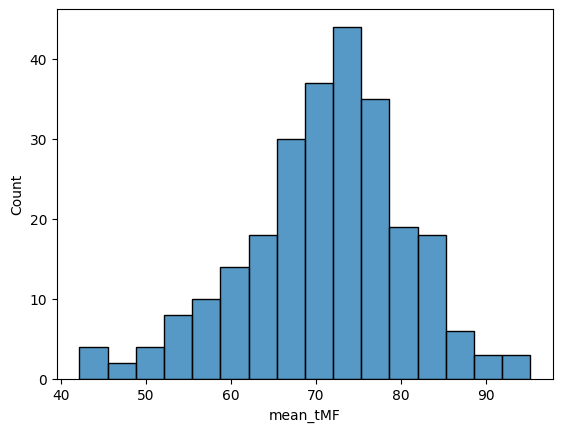

In [63]:
sns.histplot(data = pair0_MF_stims, x = 'mean_tMF')

### Pair index 1

In [64]:
pair1_max_tMF = trained_stims[trained_stims.pair_index == 1].shuffle_ts.max()
pair1_min_tMF = trained_stims[trained_stims.pair_index == 1].shuffle_ts.min()

In [65]:
pair1_max_tMF

83.36983764834804

In [66]:
pair1_min_tMF

6.009747957260913

In [67]:
pair1_MF_stims = MF_stims[MF_stims.pair_index == 1]
pair1_MF_stims = pair1_MF_stims[(pair1_MF_stims.mean_tMF < pair1_max_tMF) & (pair1_MF_stims.mean_tMF > pair1_min_tMF)]

In [68]:
pair1_MF_stims

address  \
1    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
2    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
3    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
4    /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
13   /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
..                                                 ...   
501  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
505  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
509  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
510  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   
511  /mnt/cube/j8xing/starling_rhythm_mfdfa/data/s_...   

                                                   tMF   mean_tMF  pair_index  
1    [27.41318689292957, 35.493700404414376, 33.565...  35.446684           1  
2    [31.334877770203068, 25.066347385277076, 25.19...  29.669375           1  
3    [40.840010995682285, 39.169452490515305, 37.15...  37.323019           1  
4    [38.26171824452931, 44.324712756122175, 53.245...  44.173515           1  
13   [24.60704308906233, 21.672631996147636, 26.737...  24.354533           1  
..                                                 ...        ...         ...  
501  [36.3369461654357, 37.873189252675665, 41.0202...  38.122329           1  
505  [50.71517461094814, 46.53555933153646, 48.2361...  44.648347           1  
509  [41.85371638305275, 39.90786427157671, 42.7258...  43.937830           1  
510  [26.52558538204335, 19.879279620525818, 27.372...  25.015613           1  
511  [27.59321013974394, 29.12630420061358, 29.5644...  28.316734           1  

[256 rows x 4 columns]

<AxesSubplot:xlabel='mean_tMF', ylabel='Count'>

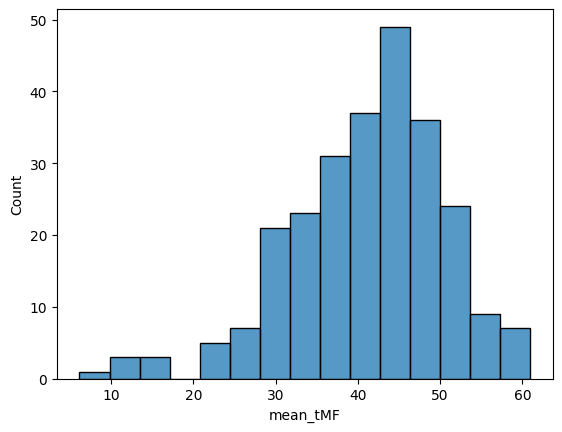

In [69]:
sns.histplot(data = pair1_MF_stims, x = 'mean_tMF')